In [61]:
import glob
from astropy.table import Table
import fitsio
import os
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import numpy as np
from scipy import stats
import pandas as pd

In [87]:
year = 2021
fafns = sorted(glob.glob("/global/cfs/cdirs/desi/spectro/data/{}*/????????/fiberassign*fits.gz".format(year)))
print(len(fafns))

7292


In [88]:
tile_nsky = []
expid = []
tile_id = []
tile_ra = []
tile_dec = []
tile_program = []
tile_ebv = []
tile_days = []

for fafn in fafns:
    _, h = fitsio.read(fafn, "PRIMARY", header=True)
    
    try:
        program = h["FAPRGRM"]
    except:
        print('failed FAPRGM with', fafn)
        continue
        
    try:
        date_string = h["NOWTIME"]
    except:
        print('failed NOW TIME with', fafn)
        continue
    
    tile_program.append(h["FAPRGRM"])
    tile_ra.append(h["TILERA"])
    tile_dec.append(h["TILEDEC"])
    
    datetime_obj = datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S%z').replace(tzinfo=pytz.UTC)
    print(datetime_obj)
    reference_date = datetime(2021, 5, 14,tzinfo=pytz.UTC) # The start of the main survey
    days_difference = (datetime_obj - reference_date).total_seconds()/(24.0*3600.0)
    tile_days.append(days_difference)
    
    d = Table(fitsio.read(fafn, "FIBERASSIGN"))
    sky_fibs = d["FIBER"][d["OBJTYPE"] == "SKY"]
    expid_str = fafn.split(os.path.sep)[-2]
    tile_nsky.append(len(sky_fibs))
    expid.append(int(expid_str))
    
tile_days = np.array(tile_days)
tile_program = np.array(tile_program)
tile_nsky = np.array(tile_nsky)


failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071093/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071094/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071095/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071096/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071097/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071099/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071100/fiberassign-080641.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071101/fiberassign-080642.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071102/fiberassign-080642.fits.gz
failed FAPRGM with /global/cfs/cdirs/desi/spectro/data/20210106/00071103/fiberassign-080642.fits.gz


In [90]:
data = {'day': tile_days, 'program': tile_program, 'n_sky': tile_nsky}
df = pd.DataFrame(data)
filename = '{}_nsky_data.csv'.format(year)
print(filename)

2021_nsky_data.csv


In [91]:
df.to_csv(filename, index=False)
data = pd.read_csv(filename)

In [95]:
data_A = pd.read_csv('2021_nsky_data.csv')
data_B = pd.read_csv('2022_nsky_data.csv')
data_C = pd.read_csv('2023_nsky_data.csv')
data = pd.concat([data_A, data_B, data_C], axis=0, ignore_index=True)

0.05972149253606617
0.1753546986793667


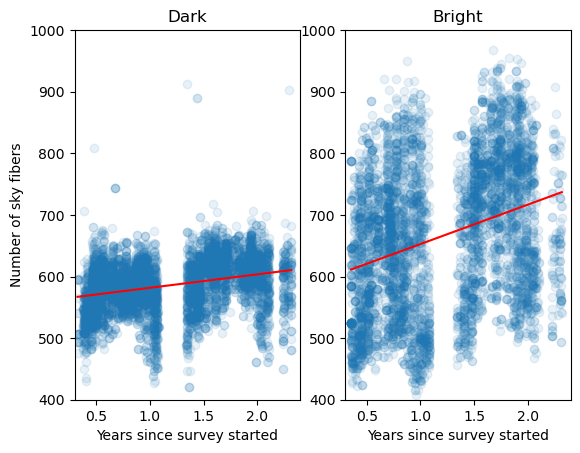

In [115]:
plt.subplot(1,2,1)

plt.title('Dark')
ii = (data['program']=='dark') #& (data['day']>600)
plt.scatter(data['day'][ii]/365.0, data['n_sky'][ii], alpha=0.1)

plt.ylabel("Number of sky fibers")
plt.xlabel("Years since survey started")
plt.ylim(400,1000)
plt.xlim(0.3, 2.4)


slope, intercept, r_value, p_value, std_err = stats.linregress(data['day'][ii], data['n_sky'][ii])
x = np.sort(data['day'][ii])
plt.plot(x/365., slope*x + intercept, color='red')
print(slope)

plt.subplot(1,2,2)
plt.title('Bright')
ii = (data['program']=='bright') #& (data['day']>600)
plt.scatter(data['day'][ii]/365.0, data['n_sky'][ii], alpha=0.1)

plt.xlabel("Years since survey started")
plt.ylim(400,1000)
plt.xlim(0.3, 2.4)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['day'][ii], data['n_sky'][ii])
x = np.sort(data['day'][ii])
plt.plot(x/365., slope*x + intercept, color='red')
print(slope)
plt.savefig('sky_fibers_vs_time.pdf')
plt.savefig('sky_fibers_vs_time.png')

-0.5883110731960185


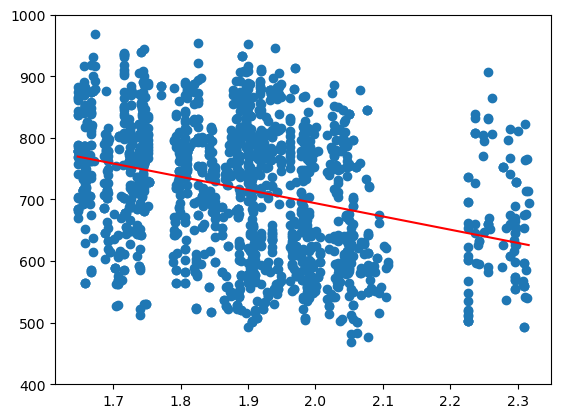

In [60]:
ii = (tile_program=='bright') & (tile_days>600)
plt.scatter(tile_days[ii]/365.0, tile_nsky[ii])
plt.ylim(400,1000)
slope, intercept, r_value, p_value, std_err = stats.linregress(tile_days[ii], tile_nsky[ii])

x = np.sort(tile_days[ii])
plt.plot(x/365., slope*x + intercept, color='red')
print(slope)

In [55]:
for a, b in zip(tileprogram, tiledays): print(a,b)

backup 652.1073726851852
bright 666.1006018518518
bright 666.1107523148148
dark 664.1120138888889
dark 666.126724537037
backup 652.1751273148149
backup 568.3994212962963
bright 666.1436921296296
bright 666.1436921296296
backup 630.2591782407408
bright 666.1922106481481
bright 666.1988773148148
dark 666.2056944444445
bright 666.2156944444445
bright 666.2161458333334
bright 666.2161458333334
bright 666.2469560185185
bright 666.2578356481481
backup 619.3621064814815
backup 666.2715509259259
tertiary20 661.9762615740741
tertiary20 661.9762615740741
tertiary20 661.9762615740741
tertiary20 661.9762615740741
tertiary20 661.9762615740741
bright 666.3535648148148
bright 666.3623958333334
bright 666.3727430555556
bright 666.3835648148148
backup 666.4071180555555
bright 666.4098148148148
bright 666.4207986111111
bright 666.4276851851852


In [43]:
fafn

'/global/cfs/cdirs/desi/spectro/data/20230401/00174429/fiberassign-023395.fits.gz'

In [15]:
a, b = fitsio.read(fafn, "PRIMARY", header=True)

In [18]:
b['REQRA']

252.49